# Modeling and Simulation in Python

Diagnostic 2b: Bonus Question

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


**Question:** how does the number of heads before the first tail depend on p?

In [19]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

%matplotlib notebook

from modsim import *

In [20]:
def flip_until_heads(system, p):
    if flip(p):
        system.heads += 1
        flip_until_heads(system, p)
    else:
        system.tails += 1
        return

def run_simulation(p):
    flipcoin = System(heads=0, tails=0)
    flip_until_heads(flipcoin, p)
    return flipcoin

def run_simulations(p, num_run=1000):
    total_number_of_heads = 0
    for i in range(num_run):
        system = run_simulation(p)
        total_number_of_heads += system.heads
    return total_number_of_heads / num_run

def sweep_prob(p_array):
    for p in p_array:
        result = run_simulations(p)
        plot(p, result, 'rs')

<IPython.core.display.Javascript object>


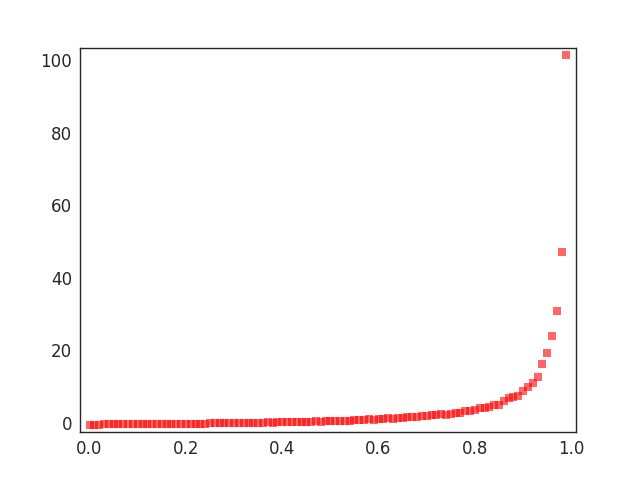

RecursionError: maximum recursion depth exceeded in comparison

In [16]:
newfig()
p_array = linspace(0, 1, 101)
sweep_prob(p_array)

<IPython.core.display.Javascript object>


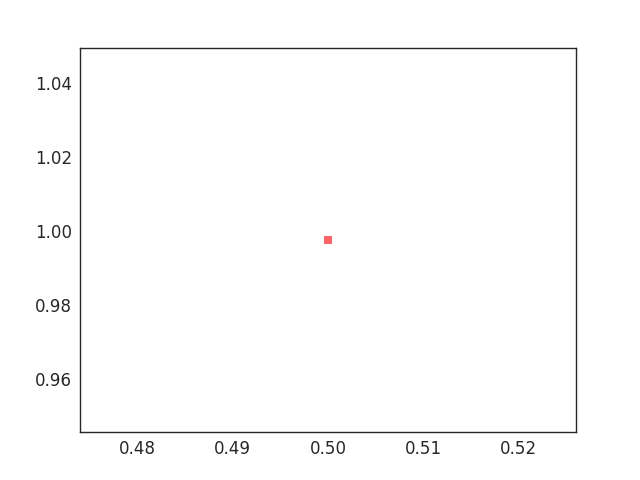

0.99802


In [17]:
newfig()
p = 0.5
result = run_simulations(p=p, num_run=100000)
plot(p, result, 'rs')
print(result)

<IPython.core.display.Javascript object>


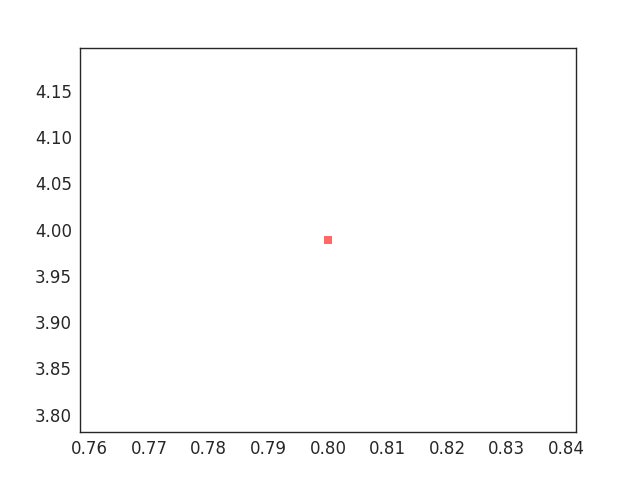

3.99105


In [18]:
newfig()
p = 0.8
result = run_simulations(p=p, num_run=100000)
plot(p, result, 'rs')
print(result)